In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from solvers import util


In [3]:
import matplotlib.font_manager
matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')

['/usr/share/fonts/Palatino LT Medium.ttf',
 '/usr/share/fonts/Palatino LT Bold Italic.ttf',
 '/usr/share/fonts/truetype/dejavu/DejaVuSans.ttf',
 '/usr/share/fonts/truetype/dejavu/DejaVuSansMono-Bold.ttf',
 '/usr/share/fonts/truetype/Palatino LT Light.ttf',
 '/usr/share/fonts/Palatino LT Light.ttf',
 '/usr/share/fonts/Palatino LT Light Italic.ttf',
 '/usr/share/fonts/truetype/Palatino LT Italic.ttf',
 '/usr/share/fonts/Palatino LT Black Italic.ttf',
 '/usr/share/fonts/Palatino LT Italic.ttf',
 '/usr/share/fonts/Palatino LT Bold.ttf',
 '/usr/share/fonts/truetype/Palatino LT Bold.ttf',
 '/usr/share/fonts/truetype/Palatino LT Black.ttf',
 '/usr/share/fonts/truetype/Palatino LT Medium.ttf',
 '/usr/share/fonts/Palatino LT Black.ttf',
 '/usr/share/fonts/Palatino LT Medium Italic.ttf',
 '/usr/share/fonts/truetype/dejavu/DejaVuSerif.ttf',
 '/usr/share/fonts/truetype/Palatino LT Black Italic.ttf',
 '/usr/share/fonts/truetype/dejavu/DejaVuSansMono.ttf',
 '/usr/share/fonts/truetype/palantino/Pala

In [4]:
import matplotlib.font_manager
flist = matplotlib.font_manager.get_fontconfig_fonts()
names = [matplotlib.font_manager.FontProperties(fname=fname).get_name() for fname in flist]
names

/tmp/ipykernel_7713/882070050.py:2: MatplotlibDeprecationWarning: 
The get_fontconfig_fonts function was deprecated in Matplotlib 3.5 and will be removed two minor releases later.
  flist = matplotlib.font_manager.get_fontconfig_fonts()


['Palatino LT Black',
 'Palatino LT Light',
 'Palatino LT',
 'Palatino LT Light',
 'Palatino LT Black',
 'Palatino LT Black',
 'Palatino LT Light',
 'Palatino LT',
 'DejaVu Sans',
 'Palatino LT',
 'Palatino LT Light',
 'Palatino LT',
 'Palatino LT',
 'Palatino LT Light',
 'Palatino LT Light',
 'Palatino LT',
 'DejaVu Sans',
 'Palatino LT Light',
 'Palatino LT Light',
 'DejaVu Sans Mono',
 'Palatino LT Black',
 'DejaVu Serif',
 'DejaVu Serif',
 'Palatino LT',
 'Palatino LT',
 'DejaVu Sans Mono',
 'Palatino LT']

#### We start by analyzing the comparison of computation times between DP-ILQR, regular consensus ADMM, and potential ADMM:

In [5]:
drones_3_8_combined= pd.read_excel('logs/ADMM_mpc_3_to_8_agents.xlsm', sheet_name='Sheet1')

In [6]:
drones_3_8_combined.columns

Index(['i_trial', ' n_agents', ' t', ' converged', ' obj_trj', 'T', 'dt',
       'radius', '         SOVA_admm ', 't_solve_avg', ' t_solve_std',
       ' MAX_ITER', ' dist_to_goal'],
      dtype='object')

In [7]:
drones_3_8_combined.columns = ['i_trial','n_agents','t','converged','obj_trj','T','dt','radius','SOVA_admm','t_solve_avg','t_solve_std','MAX_ITER','dist_to_goal']

In [8]:
drones_3_8_combined = drones_3_8_combined.loc[drones_3_8_combined['converged']==True]

In [9]:
drones_3_8_combined = drones_3_8_combined.replace(to_replace='None', value=np.nan).dropna()

In [10]:
drones_3_8_combined = drones_3_8_combined.dropna()

In [11]:
drones_3_8_combined.columns

Index(['i_trial', 'n_agents', 't', 'converged', 'obj_trj', 'T', 'dt', 'radius',
       'SOVA_admm', 't_solve_avg', 't_solve_std', 'MAX_ITER', 'dist_to_goal'],
      dtype='object')

In [12]:
drones_3_8_combined['normalized_t_solve'] = drones_3_8_combined['t_solve_avg']/drones_3_8_combined['obj_trj']

In [13]:
drones_3_8_combined['normalized_t_std'] = drones_3_8_combined['t_solve_std']/drones_3_8_combined['obj_trj']

In [14]:
dpilqr_3_to_8_agents = pd.read_excel('logs/dpilqr_3_to_8.xlsm', sheet_name='Sheet1')

In [15]:
dpilqr_3_to_8_agents.columns

Index(['dynamics', 'n_agents', 'i_trial', 'centralized', 'last', 't', 'J',
       'horizon', 'dt', 'converged', 'ids', 't_solve_avg', 't_solve_std',
       'subgraphs', 'dist_left'],
      dtype='object')

In [16]:
dpilqr_3_to_8_agents.drop(columns=['dynamics','last','ids','subgraphs'],inplace=True)

In [17]:
dpilqr_3_to_8_agents.columns = ['n_agents', 'i_trial', 'SOVA_admm', 't','obj_trj', 'T', 'dt', 'converged','t_solve_avg', 't_solve_std', 'dist_to_goal']

In [18]:
dpilqr_3_to_8_agents['normalized_t_solve'] = dpilqr_3_to_8_agents['t_solve_avg']/dpilqr_3_to_8_agents['obj_trj']


In [19]:
dpilqr_3_to_8_agents['normalized_t_std'] = dpilqr_3_to_8_agents['t_solve_std']/dpilqr_3_to_8_agents['obj_trj']

In [20]:
dpilqr_3_to_8_agents.head()

,n_agents,i_trial,SOVA_admm,t,obj_trj,T,dt,converged,t_solve_avg,t_solve_std,dist_to_goal,normalized_t_solve,normalized_t_std
0,3,0,False,1.3,828.167463,8,0.1,True,0.018375,0.003508,"[0.06809967102056529, 0.08392775736397566, 0.0...",0.000022,4.235851e-06
1,3,1,False,1.4,1247.440727,8,0.1,True,0.019545,0.001119,"[0.08209382373905584, 0.027239258113921368, 0....",0.000016,8.973174e-07
2,3,2,False,1.7,1800.550330,8,0.1,True,0.080149,0.007683,"[0.09771915630264676, 0.07990022619853404, 0.0...",0.000045,4.267041e-06
3,3,3,False,1.2,875.209328,8,0.1,True,0.037942,0.003617,"[0.027404585265289782, 0.057506596816226156, 0...",0.000043,4.133216e-06
4,3,4,False,1.1,802.755533,8,0.1,True,0.031827,0.004204,"[0.023639860153240266, 0.05510405304572813, 0....",0.000040,5.236896e-06


In [21]:
dpilqr_3_to_8_agents['SOVA_admm']='ilqr'

In [22]:
dpilqr_admm_df = pd.concat((dpilqr_3_to_8_agents,drones_3_8_combined),ignore_index=True)

In [23]:
dpilqr_admm_df.columns

Index(['n_agents', 'i_trial', 'SOVA_admm', 't', 'obj_trj', 'T', 'dt',
       'converged', 't_solve_avg', 't_solve_std', 'dist_to_goal',
       'normalized_t_solve', 'normalized_t_std', 'radius', 'MAX_ITER'],
      dtype='object')

In [39]:
import matplotlib.ticker as ticker
from matplotlib.font_manager import FontProperties
import matplotlib.font_manager
font_family = 'Palatino LT'

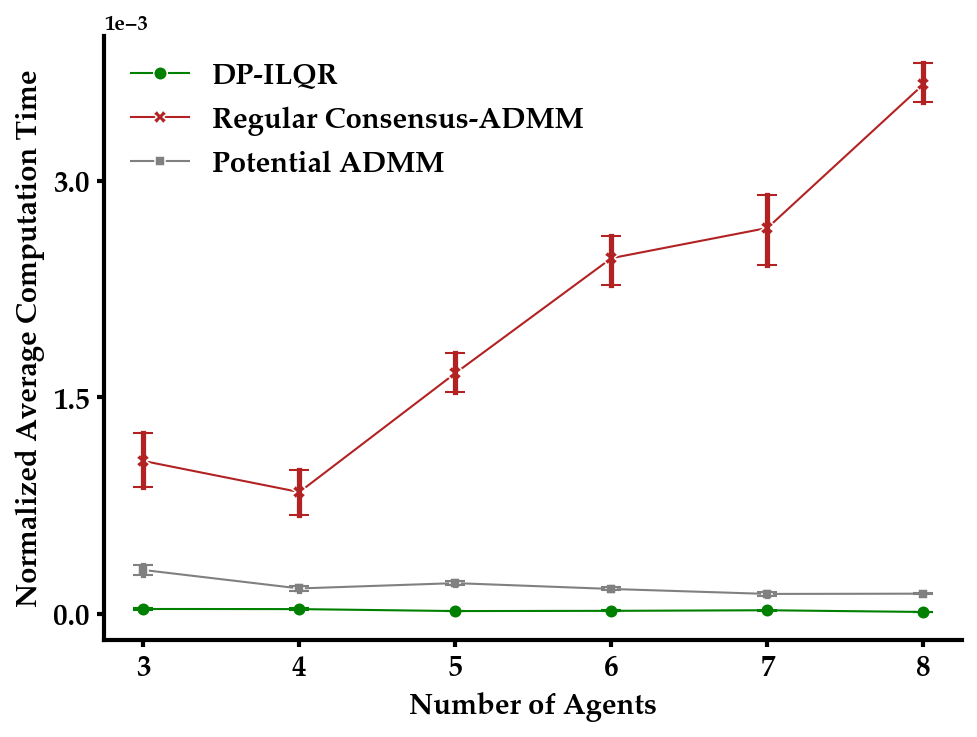

In [40]:

plt.figure(dpi=150)
err_kws = {'capsize': 5, 'capthick': 1, 'elinewidth': 2.5}
ax = sns.lineplot(data=dpilqr_admm_df, x="n_agents", y="normalized_t_solve", hue='SOVA_admm', lw=1.0, style='SOVA_admm',
                  dashes=False, markers=True, markersize=6.5, palette=["green", "firebrick", "grey"], err_style='bars', err_kws=err_kws)

for axis in ['bottom', 'left']:
    ax.spines[axis].set_linewidth(2.0)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(width=2.0)

plt.xticks(fontname = font_family, size=14, weight='bold')
plt.yticks(fontname = font_family,size=14, weight='bold')

plt.ylabel('Normalized Average Computation Time', fontname = font_family,fontsize=14, weight='bold')
plt.xlabel('Number of Agents', fontname = font_family, fontsize=14, weight='bold')
plt.legend(labels=['DP-ILQR', 'Regular Consensus-ADMM', 'Potential ADMM'], frameon=False, \
           prop={'family':font_family,'weight': 'bold', 'size': 14})

# Set y-axis to scientific notation style with fewer ticks
ax.yaxis.get_major_formatter().set_powerlimits((-2, 2))
ax.yaxis.set_major_locator(ticker.MaxNLocator(nbins=4))
font = FontProperties(family=font_family,weight='bold')
ax.yaxis.get_offset_text().set_font_properties(font)
plt.savefig('results/avg_computation_times_comparison.png', bbox_inches = 'tight', dpi=250, facecolor = ax.get_facecolor())

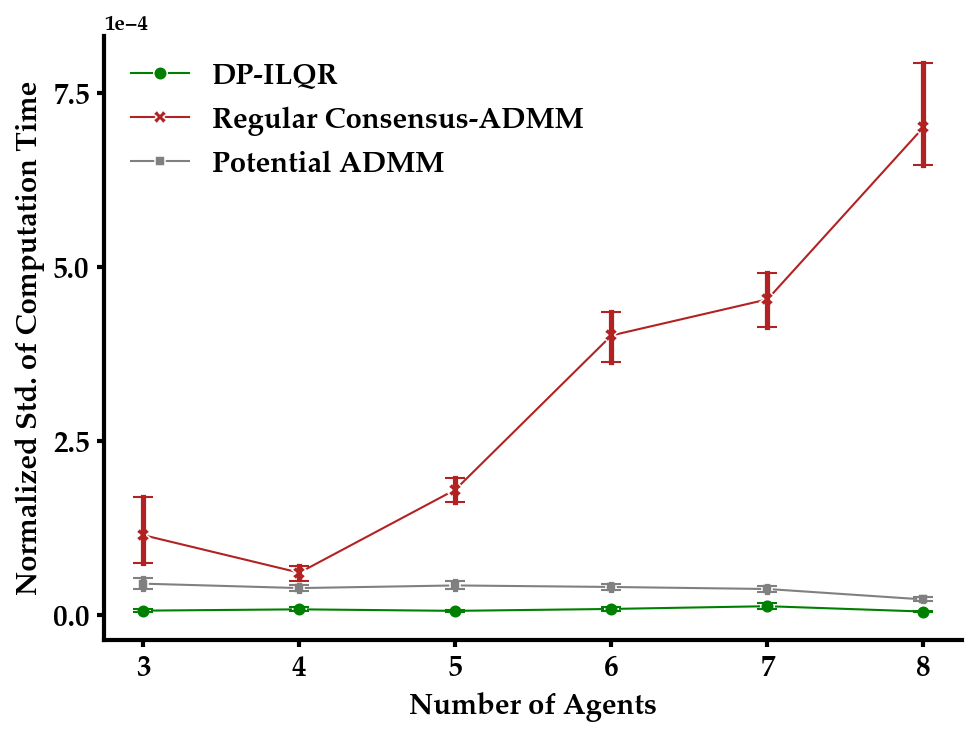

In [41]:
plt.figure(dpi=150)
err_kws = {'capsize': 5, 'capthick':1, 'elinewidth':2.5}
ax = sns.lineplot(data=dpilqr_admm_df, x="n_agents", y="normalized_t_std", hue='SOVA_admm', lw=1.0, style='SOVA_admm',
             dashes=False, markers=True, markersize=6.5,palette=["green", "firebrick", "grey"], err_style='bars', err_kws = err_kws)


for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(2.0)
    
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(width=2.0)

plt.xticks(fontname = font_family, size=14, weight='bold')
plt.yticks(fontname = font_family,size=14, weight='bold')
# ax.set_xlabel(ax.get_xlabel(), fontsize=12, weight='bold')
# ax.set_ylabel(ax.get_ylabel(), fontsize=12, weight='bold')
plt.ylabel('Normalized Std. of Computation Time',fontname = font_family,fontsize=14, weight='bold');
plt.xlabel('Number of Agents',fontname = font_family,fontsize=14, weight='bold');
plt.legend(labels=['DP-ILQR','Regular Consensus-ADMM','Potential ADMM'],frameon=False,\
           prop={'family':font_family,'weight':'bold','size':14})

# Set y-axis to scientific notation style with fewer ticks
ax.yaxis.get_major_formatter().set_powerlimits((-2, 2))
ax.yaxis.set_major_locator(ticker.MaxNLocator(nbins=4))
font = FontProperties(family=font_family,weight='bold')
ax.yaxis.get_offset_text().set_font_properties(font)

plt.savefig('results/std_computation_times_comparison.png', bbox_inches = 'tight', dpi=250, facecolor = ax.get_facecolor())


#### Now we analyze optimality gaps between DP-ILQR and potential ADMM compared against a vanilla centralized MPC baseline


In [44]:
optimality_df = pd.read_excel('logs/optimality_gap_admm.xlsm', sheet_name='optimality_gap_admm')

In [45]:
optimality_df.columns

Index(['i_trial', ' n_agents', ' t', ' converged', ' obj_trj', 'T', 'dt',
       'radius', '         SOVA_admm ', 't_solve_avg', ' t_solve_std',
       ' MAX_ITER', ' dist_to_goal'],
      dtype='object')

In [46]:
optimality_df.columns = ['i_trial', 'n_agents', 't', 'converged', 'obj_trj', 'T', 'dt',
       'radius', 'SOVA_admm', 't_solve_avg', 't_solve_std',
       'MAX_ITER', 'dist_to_goal']

In [47]:
# optimality_df = optimality_df[optimality_df['converged']==True]

In [48]:
optimality_df = optimality_df.replace(to_replace=np.inf, value=np.nan).dropna()

In [49]:
optimality_df['normalized_t_solve'] = optimality_df['t_solve_avg']/optimality_df['obj_trj']


In [50]:
optimality_df['normalized_t_std'] = optimality_df['t_solve_std']/optimality_df['obj_trj']

In [51]:
optimality_df.columns

Index(['i_trial', 'n_agents', 't', 'converged', 'obj_trj', 'T', 'dt', 'radius',
       'SOVA_admm', 't_solve_avg', 't_solve_std', 'MAX_ITER', 'dist_to_goal',
       'normalized_t_solve', 'normalized_t_std'],
      dtype='object')

In [52]:
optimality_df.head()

,i_trial,n_agents,t,converged,obj_trj,T,dt,radius,SOVA_admm,t_solve_avg,t_solve_std,MAX_ITER,dist_to_goal,normalized_t_solve,normalized_t_std
0,0,3,1.4,True,575.478449,8,0.1,0.2,centralized_mpc,0.444579,0.054243,3,[0.091 0.098 0.019],0.000773,0.000094
1,0,3,1.7,True,702.365930,8,0.1,0.2,True,0.550193,0.103038,3,[0.093 0.095 0.006],0.000783,0.000147
2,1,3,1.1,True,417.745606,8,0.1,0.2,centralized_mpc,0.344347,0.009739,3,[0.1 0.032 0.065],0.000824,0.000023
3,1,3,1.1,True,450.888900,8,0.1,0.2,True,0.554648,0.107749,3,[0.093 0.051 0.052],0.001230,0.000239
4,2,3,1.3,True,657.328357,8,0.1,0.2,centralized_mpc,0.342675,0.017245,3,[0.033 0.054 0.087],0.000521,0.000026


In [53]:
relative_gap_admm_3_agents =np.abs(optimality_df[(optimality_df['n_agents']==3) & (optimality_df['SOVA_admm']==True)]['obj_trj'].values-\
                optimality_df[(optimality_df['n_agents']==3) & (optimality_df['SOVA_admm']=='centralized_mpc')]['obj_trj'].values)/optimality_df[(optimality_df['n_agents']==3) & (optimality_df['SOVA_admm']=='centralized_mpc')]['obj_trj'].values

In [54]:
relative_gap_admm_4_agents =np.abs(optimality_df[(optimality_df['n_agents']==4) & (optimality_df['SOVA_admm']==True)]['obj_trj'].values-\
                optimality_df[(optimality_df['n_agents']==4) & (optimality_df['SOVA_admm']=='centralized_mpc')]['obj_trj'].values)/optimality_df[(optimality_df['n_agents']==4) & (optimality_df['SOVA_admm']=='centralized_mpc')]['obj_trj'].values

In [55]:
relative_gap_admm_5_agents =np.abs(optimality_df[(optimality_df['n_agents']==5) & (optimality_df['SOVA_admm']==True)]['obj_trj'].values-\
                optimality_df[(optimality_df['n_agents']==5) & (optimality_df['SOVA_admm']=='centralized_mpc')]['obj_trj'].values)/optimality_df[(optimality_df['n_agents']==5) & (optimality_df['SOVA_admm']=='centralized_mpc')]['obj_trj'].values

In [56]:
relative_gap_admm_6_agents =np.abs(optimality_df[(optimality_df['n_agents']==6) & (optimality_df['SOVA_admm']==True)]['obj_trj'].values-\
                optimality_df[(optimality_df['n_agents']==6) & (optimality_df['SOVA_admm']=='centralized_mpc')]['obj_trj'].values)/optimality_df[(optimality_df['n_agents']==5) & (optimality_df['SOVA_admm']=='centralized_mpc')]['obj_trj'].values

In [57]:
relative_gap_admm_7_agents =np.abs(optimality_df[(optimality_df['n_agents']==7) & (optimality_df['SOVA_admm']==True)]['obj_trj'].values-\
                optimality_df[(optimality_df['n_agents']==7) & (optimality_df['SOVA_admm']=='centralized_mpc')]['obj_trj'].values)/optimality_df[(optimality_df['n_agents']==7) & (optimality_df['SOVA_admm']=='centralized_mpc')]['obj_trj'].values

In [58]:
relative_gap_admm_8_agents =np.abs(optimality_df[(optimality_df['n_agents']==8) & (optimality_df['SOVA_admm']==True)]['obj_trj'].values-\
                optimality_df[(optimality_df['n_agents']==8) & (optimality_df['SOVA_admm']=='centralized_mpc')]['obj_trj'].values)/optimality_df[(optimality_df['n_agents']==8) & (optimality_df['SOVA_admm']=='centralized_mpc')]['obj_trj'].values

In [59]:
relative_gap_admm = np.vstack((relative_gap_admm_3_agents,relative_gap_admm_4_agents,relative_gap_admm_5_agents,
                               relative_gap_admm_6_agents,relative_gap_admm_7_agents,relative_gap_admm_8_agents))

In [60]:
n_agents = np.array(([3]*30, [4]*30, [5]*30, [6]*30, [7]*30, [8]*30))

In [61]:
n_agents.size

180

In [62]:
optimality_new_df = pd.DataFrame({'n_agents':n_agents.flatten(),
                                  'relative_gap_admm':relative_gap_admm.flatten()})

In [63]:
optimality_new_df['relative_gap_admm']=optimality_new_df['relative_gap_admm']*100

In [64]:
optimality_new_df

,n_agents,relative_gap_admm
0,3,22.049041
1,3,7.933846
2,3,0.545113
3,3,1.902027
4,3,1.659460
...,...,...
175,8,6.580322
176,8,8.405246
177,8,7.942838
178,8,14.331429


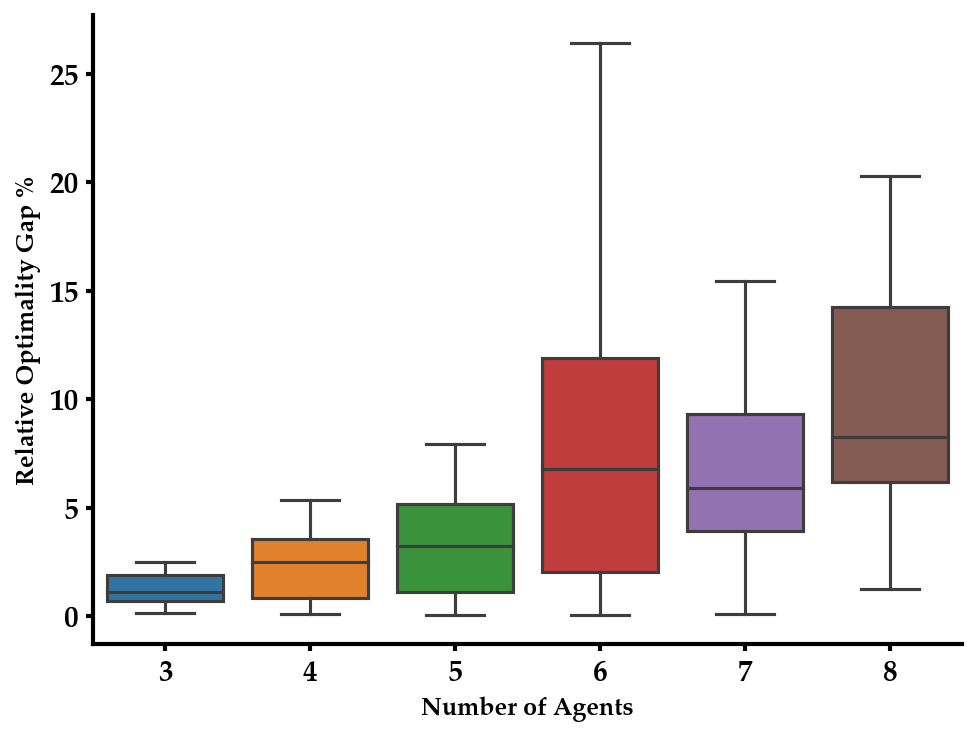

In [67]:
plt.figure(dpi=150)
err_kws = {'capsize': 5, 'capthick':1, 'elinewidth':2.5}
# sns.lineplot(data=optimality_new_df, x="n_agents", y="relative_gap_admm", lw=1.0, dashes=False,
#               markers=True, err_style='bars', err_kws = err_kws)

ax = sns.boxplot(x='n_agents',y='relative_gap_admm',data=optimality_new_df, showfliers = False)
# plt.scatter(data=optimality_stats, x="n_agents", y="mean")

for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(2.0)
    
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(width=2.0)

plt.xticks(fontname = font_family, size=14, weight='bold')
plt.yticks(fontname = font_family,size=14, weight='bold')

# ax.yaxis.set_major_locator(ticker.MaxNLocator(nbins=4))
plt.ylabel('Relative Optimality Gap %',fontname = font_family,fontsize=12,weight='bold');
plt.xlabel('Number of Agents',fontname = font_family, fontsize=12,weight='bold');

# plt.legend(labels=['Potential ADMM optimality gap',
#                    ],frameon=False,prop={'weight':'bold','size':8},loc = 'best')

plt.savefig('results/potential_admm_optimality_gap.png', bbox_inches = 'tight', dpi=250, facecolor = ax.get_facecolor())

In [356]:
optimality_stats = optimality_new_df.groupby('n_agents').agg({'relative_gap_admm':['mean','std']})
optimality_stats.columns = ['mean %','std %']
optimality_stats = optimality_stats.reset_index()
optimality_stats

In [359]:
optimality_stats

,n_agents,mean %,std %
0,3,2.687816,4.320282
1,4,5.363414,9.944916
2,5,4.388250,5.322935
3,6,9.399273,10.607020
4,7,7.556858,6.614591
5,8,9.901150,6.219642


#### The following optimality gap analysis uses data where each scenario is run 60 trials:

In [70]:
optimality_60trials = pd.read_excel('logs/optimality_gap_60Trials.xlsm', sheet_name='optimality_gap_60Trials')

In [71]:
optimality_60trials.columns = ['i_trial', 'n_agents', 't', 'converged', 'obj_trj', 'T', 'dt',
       'radius', 'SOVA_admm', 't_solve_avg', 't_solve_std',
       'MAX_ITER', 'dist_to_goal']

In [72]:
optimality_60trials.head()

,i_trial,n_agents,t,converged,obj_trj,T,dt,radius,SOVA_admm,t_solve_avg,t_solve_std,MAX_ITER,dist_to_goal
0,0,3,1.2,True,618.599116,8,0.1,0.2,centralized_mpc,0.423846,0.105043,3,[0.08 0.055 0.093]
1,0,3,1.2,True,652.274774,8,0.1,0.2,True,0.463307,0.046052,3,[0.084 0.051 0.049]
2,1,3,1.0,True,411.398870,8,0.1,0.2,centralized_mpc,0.327532,0.009642,3,[0.04 0.081 0.074]
3,1,3,1.0,True,418.837521,8,0.1,0.2,True,0.434283,0.023814,3,[0.043 0.087 0.08 ]
4,2,3,1.2,True,561.208497,8,0.1,0.2,centralized_mpc,0.335040,0.016040,3,[0.046 0.076 0.088]


In [73]:
agents_3_60trials =np.abs(optimality_60trials[(optimality_60trials['n_agents']==3) & (optimality_60trials['SOVA_admm']==True)]['obj_trj'].values-\
                optimality_60trials[(optimality_60trials['n_agents']==3) & (optimality_60trials['SOVA_admm']=='centralized_mpc')]['obj_trj'].values)/optimality_60trials[(optimality_60trials['n_agents']==3) & (optimality_60trials['SOVA_admm']=='centralized_mpc')]['obj_trj'].values

In [74]:
agents_4_60trials =np.abs(optimality_60trials[(optimality_60trials['n_agents']==4) & (optimality_60trials['SOVA_admm']==True)]['obj_trj'].values-\
                optimality_60trials[(optimality_60trials['n_agents']==4) & (optimality_60trials['SOVA_admm']=='centralized_mpc')]['obj_trj'].values)/optimality_60trials[(optimality_60trials['n_agents']==4) & (optimality_60trials['SOVA_admm']=='centralized_mpc')]['obj_trj'].values

In [75]:
agents_5_60trials =np.abs(optimality_60trials[(optimality_60trials['n_agents']==5) & (optimality_60trials['SOVA_admm']==True)]['obj_trj'].values-\
                optimality_60trials[(optimality_60trials['n_agents']==5) & (optimality_60trials['SOVA_admm']=='centralized_mpc')]['obj_trj'].values)/optimality_60trials[(optimality_60trials['n_agents']==5) & (optimality_60trials['SOVA_admm']=='centralized_mpc')]['obj_trj'].values

In [76]:
agents_6_60trials =np.abs(optimality_60trials[(optimality_60trials['n_agents']==6) & (optimality_60trials['SOVA_admm']==True)]['obj_trj'].values-\
                optimality_60trials[(optimality_60trials['n_agents']==6) & (optimality_60trials['SOVA_admm']=='centralized_mpc')]['obj_trj'].values)/optimality_60trials[(optimality_60trials['n_agents']==6) & (optimality_60trials['SOVA_admm']=='centralized_mpc')]['obj_trj'].values

In [77]:
agents_7_60trials =np.abs(optimality_60trials[(optimality_60trials['n_agents']==7) & (optimality_60trials['SOVA_admm']==True)]['obj_trj'].values-\
                optimality_60trials[(optimality_60trials['n_agents']==7) & (optimality_60trials['SOVA_admm']=='centralized_mpc')]['obj_trj'].values)/optimality_60trials[(optimality_60trials['n_agents']==7) & (optimality_60trials['SOVA_admm']=='centralized_mpc')]['obj_trj'].values

In [78]:
agents_8_60trials =np.abs(optimality_60trials[(optimality_60trials['n_agents']==8) & (optimality_60trials['SOVA_admm']==True)]['obj_trj'].values-\
                optimality_60trials[(optimality_60trials['n_agents']==8) & (optimality_60trials['SOVA_admm']=='centralized_mpc')]['obj_trj'].values)/optimality_60trials[(optimality_60trials['n_agents']==8) & (optimality_60trials['SOVA_admm']=='centralized_mpc')]['obj_trj'].values

In [79]:
def reject_outliers_2(data, m=2.):
    d = np.abs(data - np.median(data))
    mdev = np.median(d)
    s = d / (mdev if mdev else 1.)
    return data[s < m]

In [80]:
#Remove outliers using the median and "median absolute distance to the median."
agents_3_60trials = reject_outliers_2(agents_3_60trials, m=1.5)
agents_4_60trials = reject_outliers_2(agents_4_60trials, m=1.5)
agents_5_60trials = reject_outliers_2(agents_5_60trials, m=1.5)
agents_6_60trials = reject_outliers_2(agents_6_60trials, m=1.5)
agents_7_60trials = reject_outliers_2(agents_7_60trials, m=1.5)
agents_8_60trials = reject_outliers_2(agents_8_60trials, m=1.5)



In [81]:
relative_gap_admm = np.hstack((agents_3_60trials ,agents_4_60trials ,agents_5_60trials ,
                               agents_6_60trials ,agents_7_60trials ,agents_8_60trials ))

In [82]:
n_agents = np.hstack(([3]*agents_3_60trials.size,
                      [4]*agents_4_60trials.size, 
                      [5]*agents_5_60trials.size, 
                      [6]*agents_6_60trials.size, 
                      [7]*agents_7_60trials.size, 
                      [8]*agents_8_60trials.size))

In [83]:
optimality_new_df = pd.DataFrame({'n_agents':n_agents.flatten(),
                                  'relative_gap_admm':relative_gap_admm.flatten()})

In [84]:
optimality_new_df['relative_gap_admm'] = optimality_new_df['relative_gap_admm']*100

In [85]:
optimality_stats = optimality_new_df.groupby('n_agents').agg({'relative_gap_admm':['mean','std']})
optimality_stats.columns = ['mean %','std %']
optimality_stats = optimality_stats.reset_index()
optimality_stats

,n_agents,mean %,std %
0,3,0.862002,0.153643
1,4,0.819996,0.411973
2,5,2.694291,1.820282
3,6,3.571168,2.651489
4,7,5.204225,3.314343
5,8,7.649426,4.117975


<Figure size 960x720 with 0 Axes>

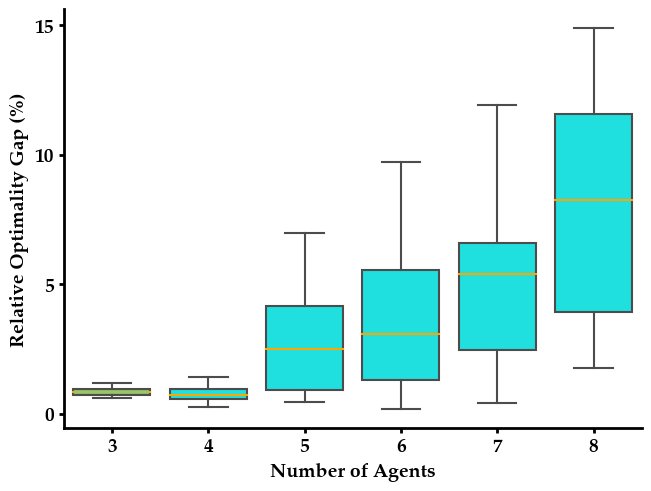

In [88]:
plt.figure(dpi=150)  # Increase dpi for better resolution (adjust as needed)
fig, ax = plt.subplots()
sns.boxplot(x='n_agents', y='relative_gap_admm', data=optimality_new_df, ax=ax, color="cyan", showfliers=False,
            medianprops={'color': 'orange','linewidth':1.5})
sns.despine(right=True)

# Increase linewidth of bottom and left spines
for axis in ['bottom', 'left']:
    ax.spines[axis].set_linewidth(2.0)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Increase tick width
ax.tick_params(width=2.0)

# Increase label and tick font sizes
plt.xticks(fontname = font_family, size=14, weight='bold')
plt.yticks(fontname = font_family,size=14, weight='bold')

plt.ylabel('Relative Optimality Gap (%)', fontname = font_family, fontsize=14, weight='bold')
plt.xlabel('Number of Agents', fontname = font_family, fontsize=14, weight='bold')

ax.yaxis.set_major_locator(ticker.MaxNLocator(nbins=4))
# Add a legend if necessary
# plt.legend(labels=['Potential ADMM optimality gap'], frameon=False, prop={'weight': 'bold', 'size': 8}, loc='best')

plt.savefig('results/potential_admm_optimality_gap.png', bbox_inches='tight', dpi=250, facecolor=ax.get_facecolor())

# Show the plot (optional)
plt.show()

#### The following optimality gap analysis uses simulation data in which the max. ADMM iterations for each trial is 20:

In [433]:
optimality_gap_20 = pd.read_excel('optimality_gap_20Iters.xlsm',sheet_name='optimality_gap_20Iters')

In [434]:
optimality_gap_20.columns

Index(['i_trial', ' n_agents', ' t', ' converged', ' obj_trj', 'T', 'dt',
       'radius', '         SOVA_admm ', 't_solve_avg', ' t_solve_std',
       ' MAX_ITER', ' dist_to_goal'],
      dtype='object')

In [435]:
optimality_gap_20.columns = ['i_trial', 'n_agents', 't', 'converged', 'obj_trj', 'T', 'dt',
       'radius', 'SOVA_admm', 't_solve_avg', 't_solve_std',
       'MAX_ITER', 'dist_to_goal']

In [436]:
relative_gap_20Iters_3_agents =np.abs(optimality_gap_20[(optimality_gap_20['n_agents']==3) & (optimality_gap_20['SOVA_admm']==True)]['obj_trj'].values-\
                optimality_gap_20[(optimality_gap_20['n_agents']==3) & (optimality_gap_20['SOVA_admm']=='centralized_mpc')]['obj_trj'].values)/optimality_gap_20[(optimality_gap_20['n_agents']==3) & (optimality_gap_20['SOVA_admm']=='centralized_mpc')]['obj_trj'].values

In [437]:
relative_gap_20Iters_4_agents =np.abs(optimality_gap_20[(optimality_gap_20['n_agents']==4) & (optimality_gap_20['SOVA_admm']==True)]['obj_trj'].values-\
                optimality_gap_20[(optimality_gap_20['n_agents']==4) & (optimality_gap_20['SOVA_admm']=='centralized_mpc')]['obj_trj'].values)/optimality_gap_20[(optimality_gap_20['n_agents']==4) & (optimality_gap_20['SOVA_admm']=='centralized_mpc')]['obj_trj'].values

In [438]:
relative_gap_20Iters_5_agents =np.abs(optimality_gap_20[(optimality_gap_20['n_agents']==5) & (optimality_gap_20['SOVA_admm']==True)]['obj_trj'].values-\
                optimality_gap_20[(optimality_gap_20['n_agents']==5) & (optimality_gap_20['SOVA_admm']=='centralized_mpc')]['obj_trj'].values)/optimality_gap_20[(optimality_gap_20['n_agents']==5) & (optimality_gap_20['SOVA_admm']=='centralized_mpc')]['obj_trj'].values

In [439]:
relative_gap_20Iters_6_agents =np.abs(optimality_gap_20[(optimality_gap_20['n_agents']==6) & (optimality_gap_20['SOVA_admm']==True)]['obj_trj'].values-\
                optimality_gap_20[(optimality_gap_20['n_agents']==6) & (optimality_gap_20['SOVA_admm']=='centralized_mpc')]['obj_trj'].values)/optimality_gap_20[(optimality_gap_20['n_agents']==6) & (optimality_gap_20['SOVA_admm']=='centralized_mpc')]['obj_trj'].values

In [440]:
relative_gap_20Iters_7_agents =np.abs(optimality_gap_20[(optimality_gap_20['n_agents']==7) & (optimality_gap_20['SOVA_admm']==True)]['obj_trj'].values-\
                optimality_gap_20[(optimality_gap_20['n_agents']==7) & (optimality_gap_20['SOVA_admm']=='centralized_mpc')]['obj_trj'].values)/optimality_gap_20[(optimality_gap_20['n_agents']==7) & (optimality_gap_20['SOVA_admm']=='centralized_mpc')]['obj_trj'].values

In [441]:
relative_gap_20Iters_8_agents =np.abs(optimality_gap_20[(optimality_gap_20['n_agents']==8) & (optimality_gap_20['SOVA_admm']==True)]['obj_trj'].values-\
                optimality_gap_20[(optimality_gap_20['n_agents']==8) & (optimality_gap_20['SOVA_admm']=='centralized_mpc')]['obj_trj'].values)/optimality_gap_20[(optimality_gap_20['n_agents']==8) & (optimality_gap_20['SOVA_admm']=='centralized_mpc')]['obj_trj'].values

In [442]:
relative_gap_admm_20Iters = np.hstack((relative_gap_20Iters_3_agents,relative_gap_20Iters_4_agents,
                                       relative_gap_20Iters_5_agents,relative_gap_20Iters_6_agents,
                                       relative_gap_20Iters_7_agents,relative_gap_20Iters_8_agents))

In [443]:
n_agents = np.array(([3]*30, [4]*30, [5]*30, [6]*30, [7]*30)).flatten()

In [444]:
n_agents = np.hstack((n_agents,np.array(([8]*9))))

In [445]:
n_agents.size

159

In [446]:
relative_gap_admm_20Iters.shape

(159,)

In [447]:
optimality_gap_20_Iters_df = pd.DataFrame({'n_agents':n_agents,
                                  'relative_gap_admm':relative_gap_admm_20Iters.flatten()})

In [448]:
optimality_gap_20_Iters_df['relative_gap_admm']=optimality_gap_20_Iters_df['relative_gap_admm']*100

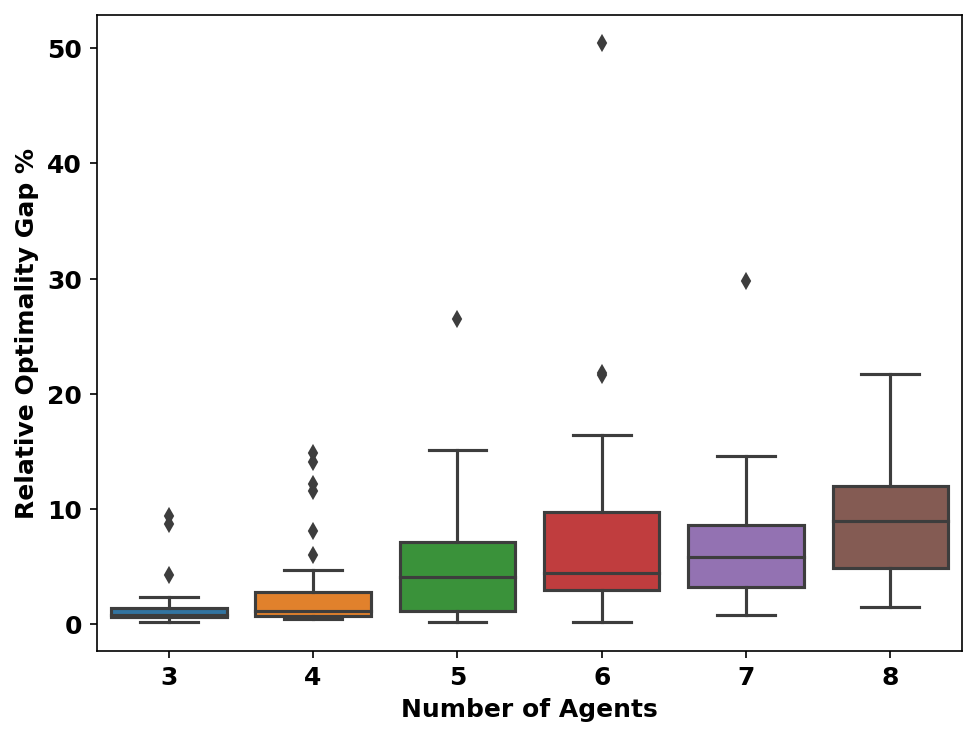

In [450]:
plt.figure(dpi=150)
err_kws = {'capsize': 5, 'capthick':1, 'elinewidth':2.5}
# sns.lineplot(data=optimality_new_df, x="n_agents", y="relative_gap_admm", lw=1.0, dashes=False,
#               markers=True, err_style='bars', err_kws = err_kws)

sns.boxplot(x='n_agents',y='relative_gap_admm',data=optimality_gap_20_Iters_df)
# plt.scatter(data=optimality_stats, x="n_agents", y="mean")

for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(2.0)
    
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(width=2.0)

plt.xticks(size=12, weight= 'bold')
plt.yticks(size=12, weight= 'bold')

plt.ylabel('Relative Optimality Gap %',fontsize=12,weight='bold');
plt.xlabel('Number of Agents',fontsize=12,weight='bold');

In [451]:
optimality_stats = optimality_gap_20_Iters_df.groupby('n_agents').agg({'relative_gap_admm':['mean','std']})
optimality_stats.columns = ['mean %','std %']
optimality_stats = optimality_stats.reset_index()
optimality_stats

,n_agents,mean %,std %
0,3,1.576287,2.181373
1,4,3.218396,4.355520
2,5,5.586353,5.789113
3,6,8.015295,9.793707
4,7,6.991744,5.645524
5,8,9.424015,6.038236
